In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_excel('restaurants data.xlsx')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [38]:
data.columns = data.columns.str.replace(' ','_')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [40]:
data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
dtype: int64

In [41]:
(data == 0).sum()

Restaurant_ID              0
Restaurant_Name            0
Country_Code               0
City                       0
Address                    0
Locality                   0
Locality_Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average_Cost_for_two      18
Currency                   0
Has_Table_booking          0
Has_Online_delivery        0
Price_range                0
Aggregate_rating        2148
Rating_color               0
Rating_text                0
Votes                   1094
dtype: int64

In [42]:
missing_city = data[(data.Longitude ==0)|(data.Latitude == 0) ].City.unique()
len(missing_city)

28

In [43]:
lat_n_long = data.groupby('City').agg('mean')[['Latitude','Longitude']].loc[missing_city]
missing_city_loc = {x:tuple(lat_n_long.loc[x]) for x in missing_city}
((data.Latitude == 0) | (data.Longitude == 0)).sum()

499

In [44]:
len(lat_n_long)

28

In [45]:
for i in data.index:
    if (data.loc[i,'Latitude'] == 0) or (data.loc[i , 'Longitude'] == 0):
        city = data.loc[i , 'City']
        lat, long = missing_city_loc[city]
        data.loc[i,'Latitude'] = lat
        data.loc[i,'Longitude'] = long

In [46]:
print('Any Duplicated Rows ? :' , data.duplicated().any())
print('No. of Duplicated Rows :', data.duplicated().sum())

Any Duplicated Rows ? : False
No. of Duplicated Rows : 0


In [47]:
data.duplicated('Restaurant_ID').any()

False

In [48]:
print('No. of unique Restaurant_IDs :', data.Restaurant_ID.nunique())
print('No. of unique Restaurant_Names :', data.Restaurant_Name.nunique())

No. of unique Restaurant_IDs : 9551
No. of unique Restaurant_Names : 7445


In [49]:
country_code = pd.read_excel('Country-Code.xlsx')
country_code.columns = country_code.columns.str.replace(' ','_')

In [50]:
data = pd.merge(data,country_code, on = 'Country_Code')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9550 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Price_range           9551 non-null   int64  
 15  Aggregate_rating     

In [52]:
data.isnull().sum()

Restaurant_ID           0
Restaurant_Name         1
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

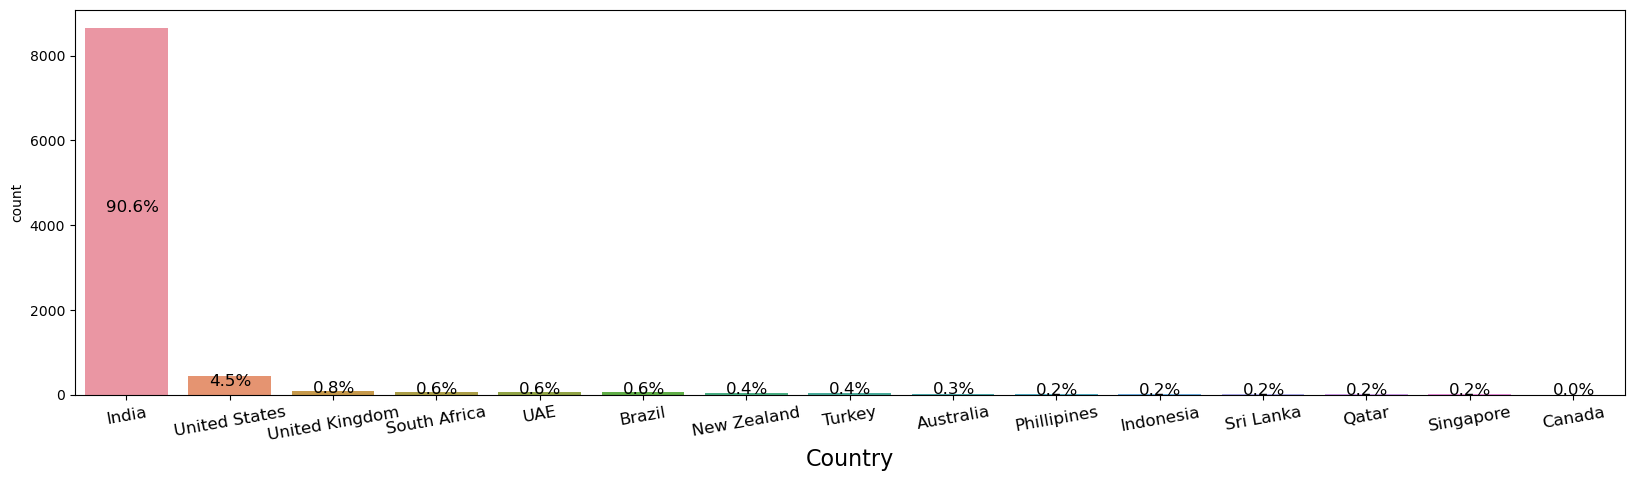

In [54]:
plt.figure(figsize = (20,5))
vc = pd.DataFrame(data.Country.value_counts()).rename({'Country':'Freq'}, axis= 1)
vc['Perc'] = (vc.Freq/vc.Freq.sum()*100).round(1)
sns.countplot(x = 'Country', data = data, order = vc.index)
for i in range(len(vc)):
    plt.annotate(str(vc.Perc[i]) +'%', xy = (i -0.2, int(vc.Freq[i]/2)),fontsize = 12)
plt.xticks(size = 12, rotation = 10)
plt.xlabel('Country',size = 16)
plt.show()

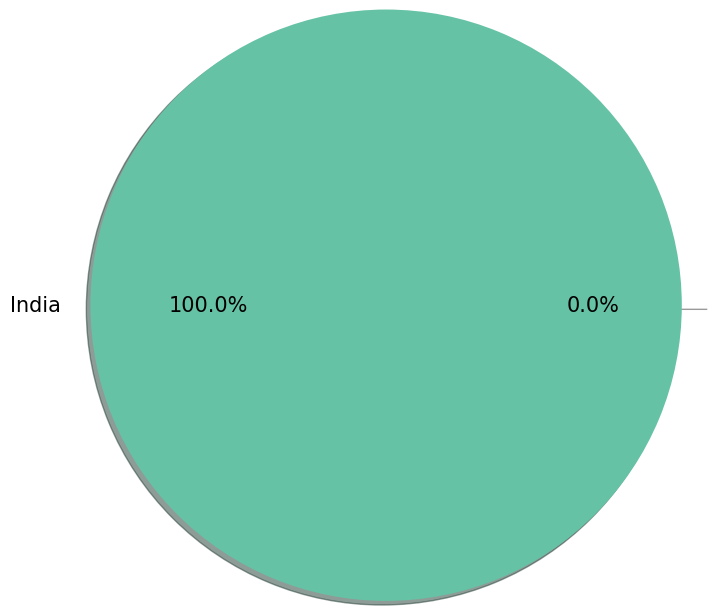

In [63]:
vc = pd.Series()
vc['India'] = len(data[data.Country == 'India'])
vc['Others'] = len(data[data.Country != 'India'])
vc.plot.pie(radius = 2,autopct = '%1.1f%%' , textprops = {'size':15 }, explode= [0.1,0.1], shadow = True, cmap ='Set2')
plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.show()

In [64]:
data = data[data.Country == 'India']

In [65]:
data['Rating_cat'] = data['Aggregate_rating'].round(0).astype(int)

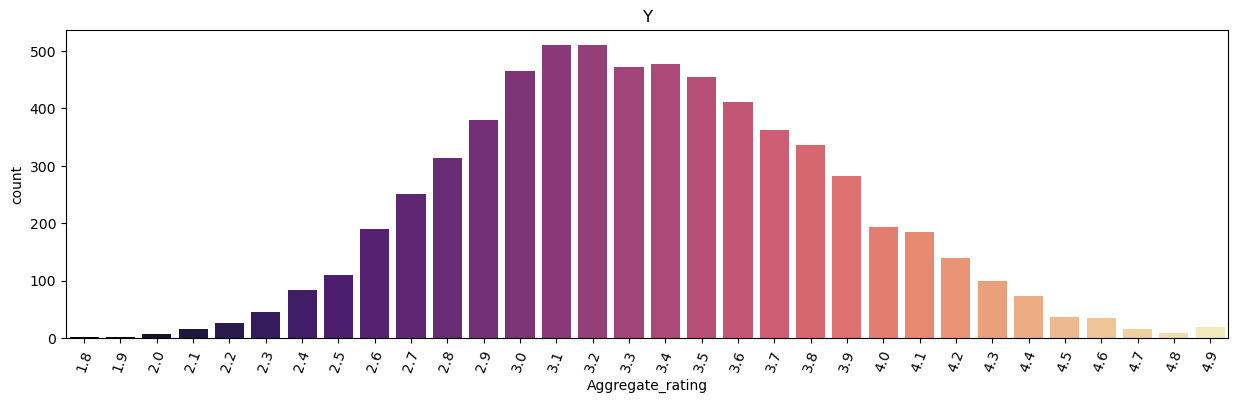

In [67]:
plt.figure( figsize = (15, 4))
sns.countplot('Aggregate_rating', data = data[data.Aggregate_rating !=0] ,palette = 'magma')
plt.tick_params('x', rotation = 70)
plt.title('Y')
plt.show()

In [68]:
data["Rating_color"].value_counts()
Color_represents = data.groupby(['Rating_color'],as_index =False)['Aggregate_rating'].mean()

In [69]:
Color_represents.columns = ['Rating_color','Average_rating']

In [70]:
Color_represents =Color_represents.sort_values(by='Average_rating',ascending=False)

In [71]:
Color_represents = Color_represents[0:5]
Color_represents['Ratings'] = ['Excellent','Very Good','Good','Okay','Poor']

In [72]:
Color_represents

,Rating_color,Average_rating,Ratings
0,Dark Green,4.646552,Excellent
1,Green,4.153324,Very Good
5,Yellow,3.677423,Good
2,Orange,3.048722,Okay
3,Red,2.296111,Poor


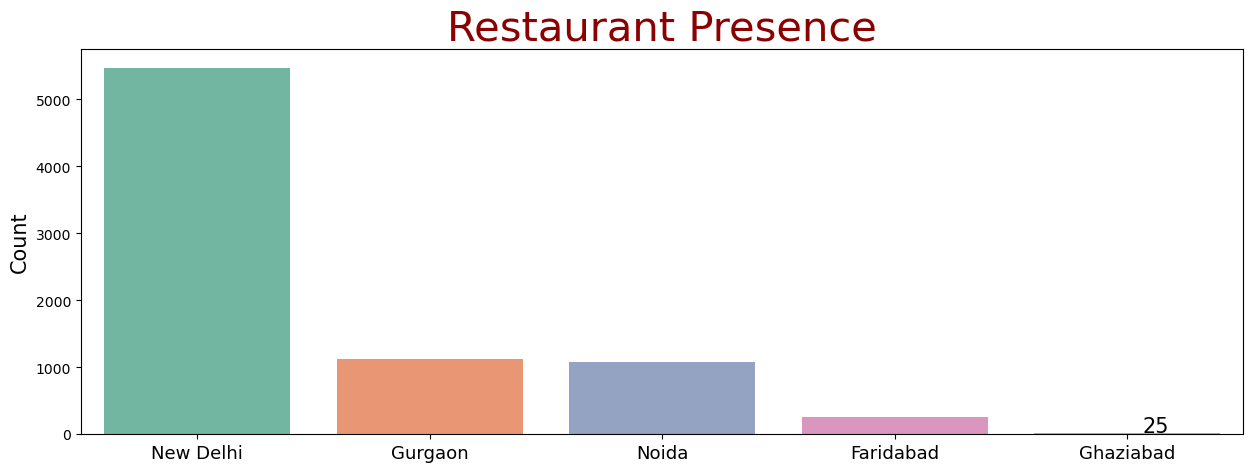

In [74]:
plt.figure(figsize = (15,5))
vc = data.City.value_counts()[:5]
g = sns.barplot(x = vc.index, y = vc.values, palette = 'Set2')
g.set_xticklabels(g.get_xticklabels(),fontsize = 13)
for i in range(5):
    value = vc[i]
g.text(y = value - 2,x = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_ylabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 30, color = 'darkred')
plt.show()

     ------------------------------------ 153.1/153.1 kB 763.8 kB/s eta 0:00:00


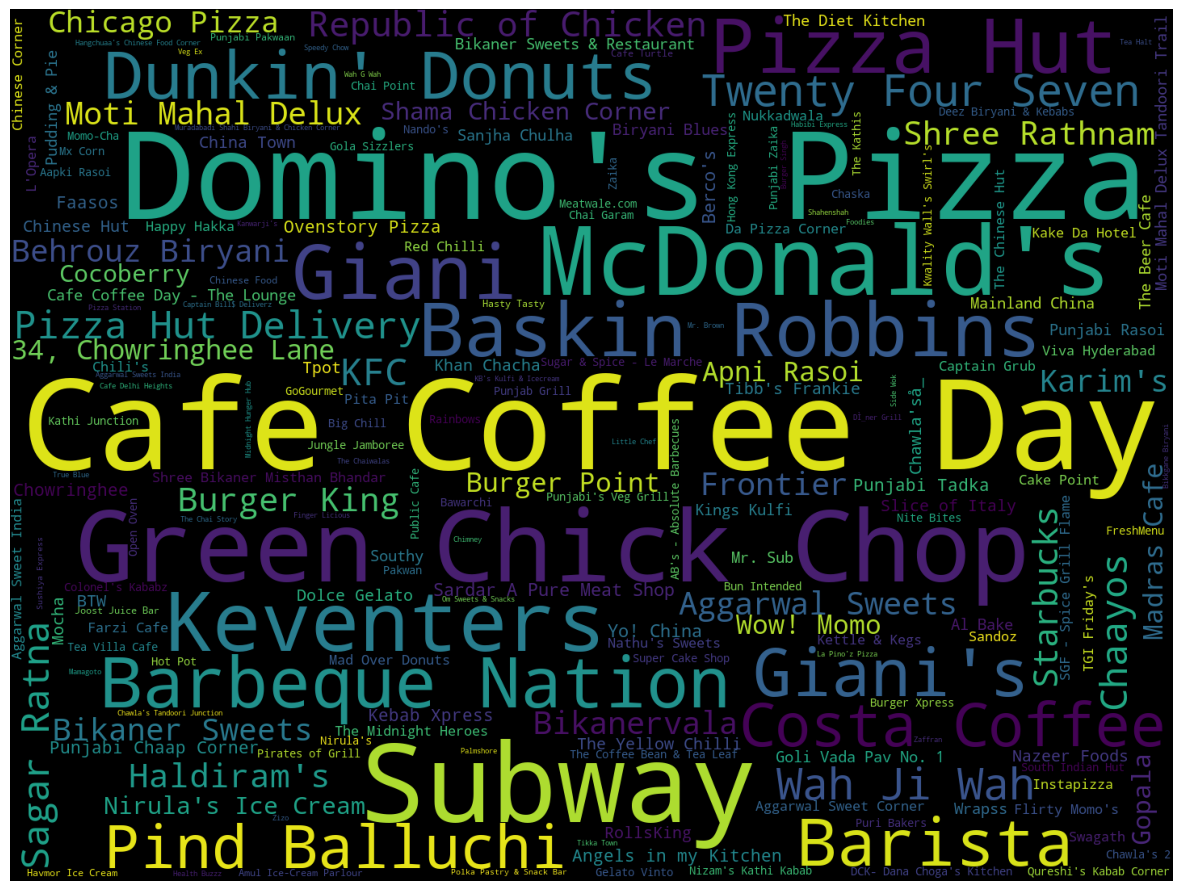

In [141]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(width=1440, height=1080, relative_scaling=0.5,stopwords=stopwords).generate_from_frequencies(data['Restaurant_Name'].value_counts()))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

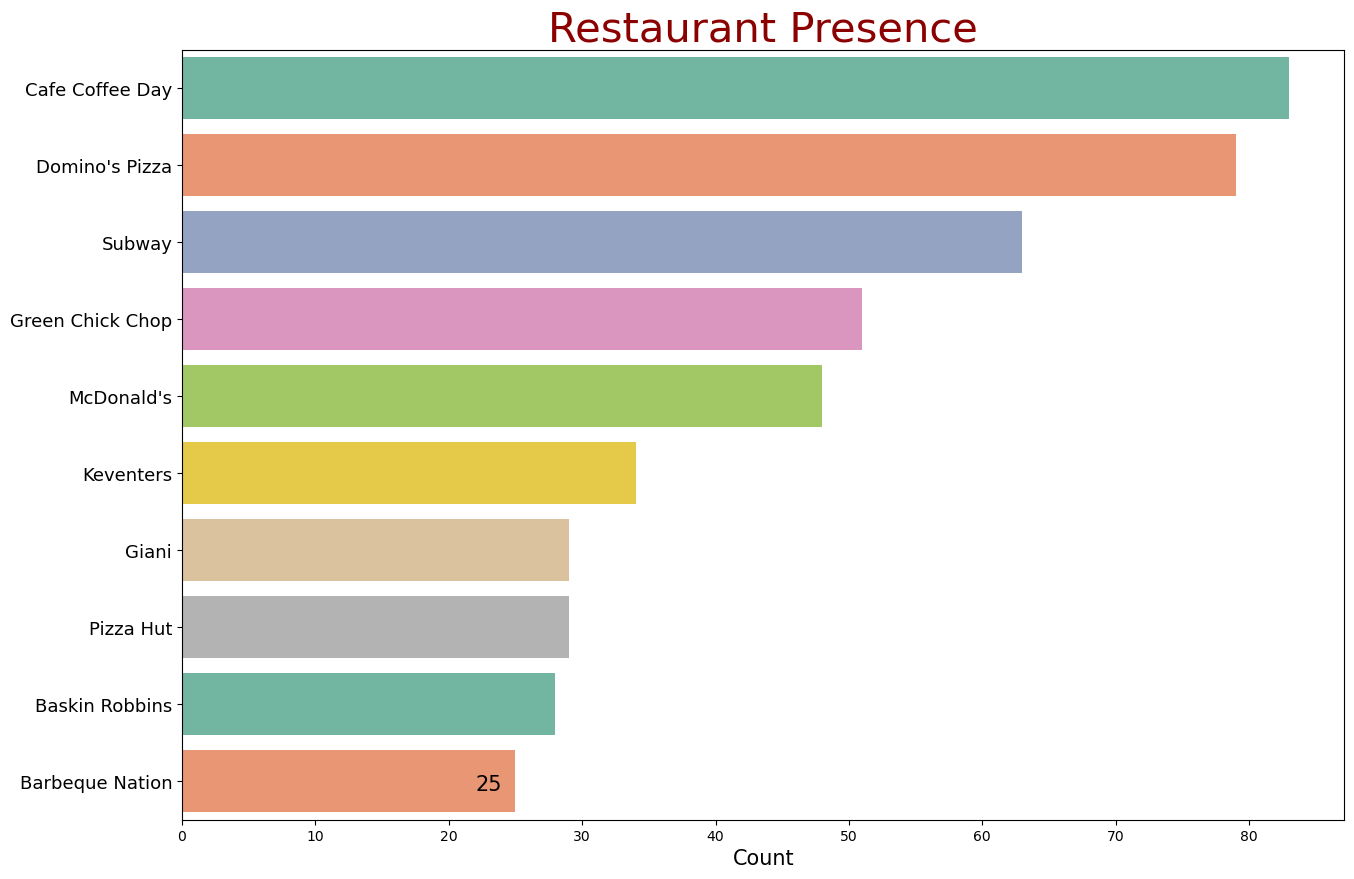

In [87]:
plt.figure(figsize = (15,10))
vc = data.Restaurant_Name.value_counts()[:10]
g = sns.barplot(y = vc.index, x = vc.values, palette = 'Set2')
g.set_yticklabels(g.get_yticklabels(),fontsize = 13)
for i in range(10):
    value = vc[i]
g.text(x = value - 2,y = i +0.125 , s = value, color='black', ha="center",fontsize = 15)
g.set_xlabel('Count', fontsize = 15)
g.set_title('Restaurant Presence', fontsize = 30, color = 'darkred')
plt.show()

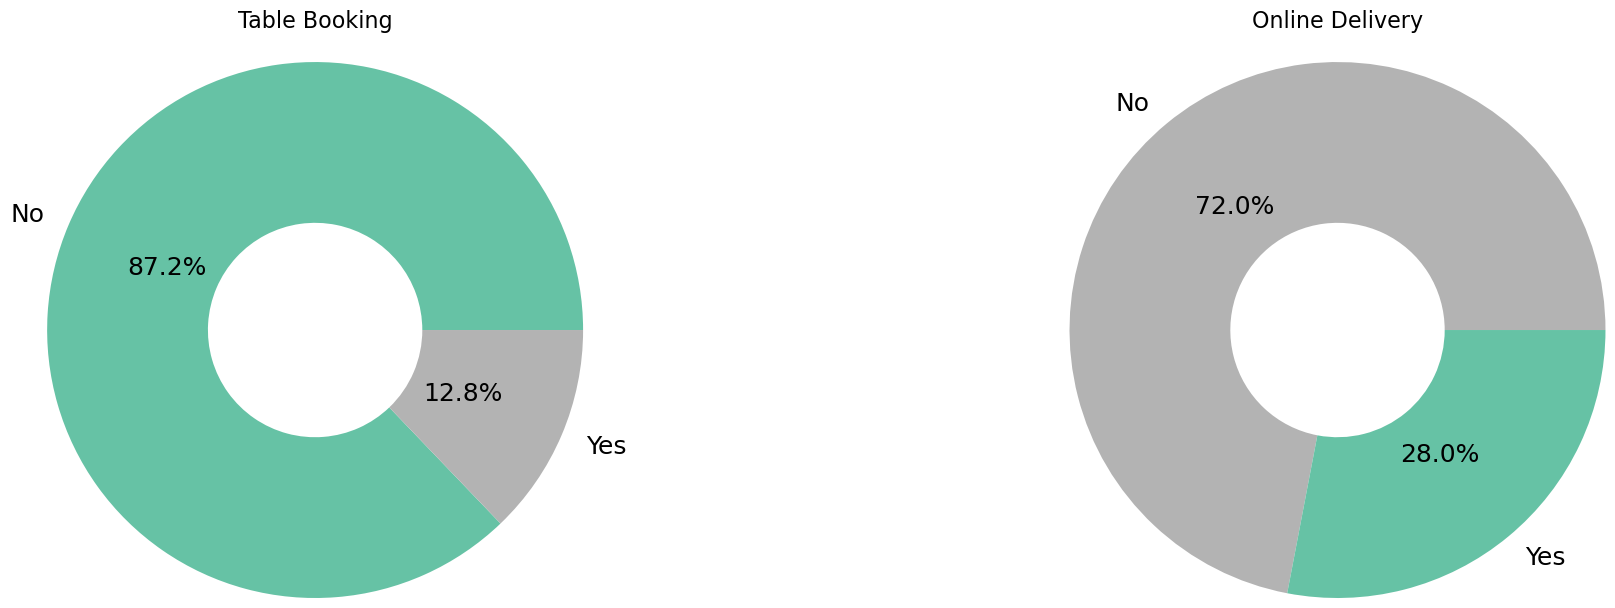

In [90]:
f,axes = plt.subplots(1,2,figsize = (20,7))
data.Has_Table_booking.value_counts().plot.pie(ax = axes[0],autopct = '%0.1f%%', radius = 1.25, wedgeprops = {'width' : 0.75}, cmap = 'Set2',
textprops = {'size' : 18,} )
#axes[0].set_xticklabels(labels = axes[0].get_xticklabels(),rotation = 0)
axes[0].set_title('Table Booking\n',fontsize = 16)
axes[0].set_ylabel('')
data.Has_Online_delivery.value_counts().plot.pie(ax = axes[1], autopct = '%0.1f%%', radius = 1.25,wedgeprops = {'width' : 0.75}, cmap = 'Set2_r',
textprops = {'size' : 18} )
axes[1].set_title('Online Delivery\n', fontsize = 16)
#axes[1].set_xticklabels(labels = axes[1].get_xticklabels(),rotation = 0)
axes[1].set_ylabel('')
plt.tight_layout(w_pad = 20, h_pad = 10, pad = 4)
plt.show()

In [91]:
pd.crosstab(data.Has_Online_delivery,data.Has_Table_booking)

Has_Table_booking,No,Yes
Has_Online_delivery,,
No,5545,684
Yes,1996,427


In [143]:
!pip install matplotlib-venn
from matplotlib_venn import venn2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32155 sha256=db3ded4effa7cabde1b3e682a0cc55f9a408bf348fa369a060fb3b89b8481dcc
  Stored in directory: c:\users\mohil\appdata\local\pip\cache\wheels\32\41\5f\d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built matplotlib-venn


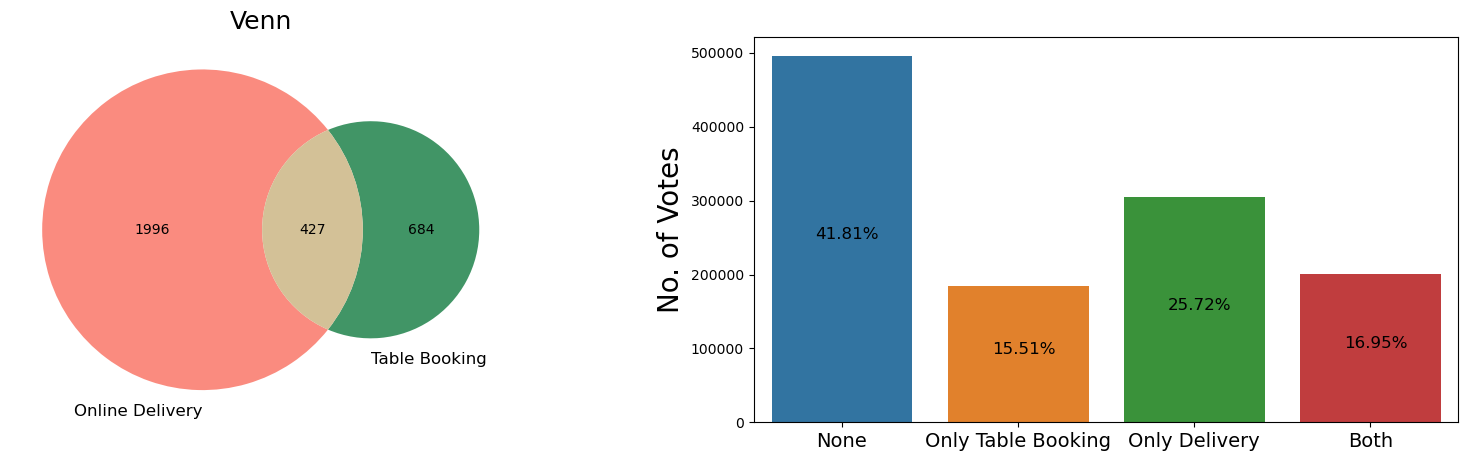

In [144]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
s1 = set(data[data.Has_Online_delivery == 'Yes'].Restaurant_ID)
s2 = set(data[data.Has_Table_booking== 'Yes'].Restaurant_ID)
out = venn2([s1,s2],['Online Delivery','Table Booking'], ['salmon','seagreen'],alpha = .91, ax = ax[0])
ax[0].set_title('Venn',fontsize =18)
#plt.show()
dc= data.pivot_table(index = ['Has_Online_delivery','Has_Table_booking'],values = 'Votes', aggfunc = 'sum')
dc.index = ['None','Only Table Booking','Only Delivery','Both']
dc['Perc'] = (dc.Votes / dc.Votes.sum() *100).round(2)
sns.barplot(x = dc.index, y = dc.Votes, ax = ax[1])
plt.xticks( rotation = 0, fontsize = 14)
plt.xlabel('')
for i in range(len(dc)):
    plt.annotate(str(dc.Perc.iloc[i]) + '%',xy = (i-0.15, int(dc.Votes.iloc[i]/2)), fontsize = 12 )
plt.ylabel('No. of Votes',fontsize = 20)
plt.show()

In [145]:
dc

,Votes,Perc
None,496366,41.81
Only Table Booking,184183,15.51
Only Delivery,305369,25.72
Both,201245,16.95


<AxesSubplot:xlabel='Aggregate_rating'>

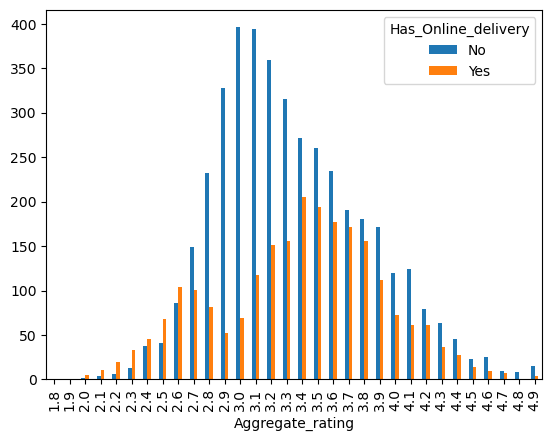

In [109]:
d = data[data.Aggregate_rating != 0]
pd.crosstab(d.Aggregate_rating, d.Has_Online_delivery).plot.bar()

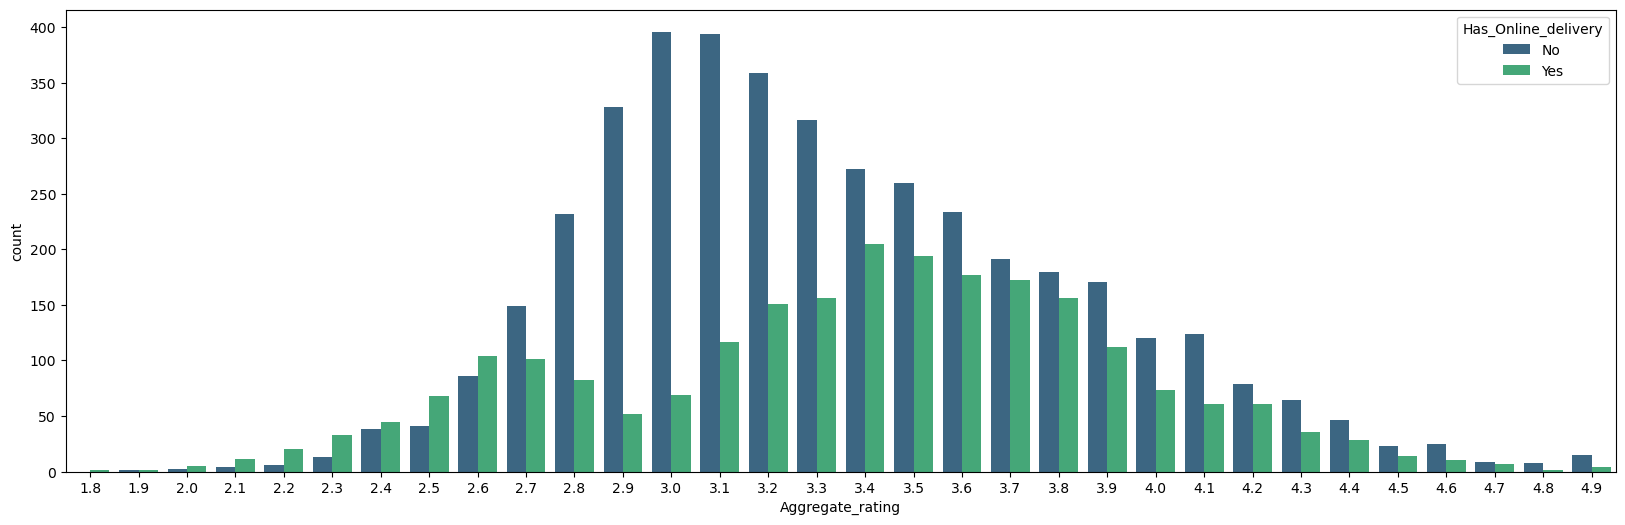

In [111]:
plt.figure(figsize=(20,6))
sns.countplot(data=data[data.Aggregate_rating !=0],x='Aggregate_rating',hue='Has_Online_delivery',palette='viridis')
plt.show()

In [112]:
top10 = data.City.value_counts()[:10]
top10[:2]

New Delhi    5473
Gurgaon      1118
Name: City, dtype: int64

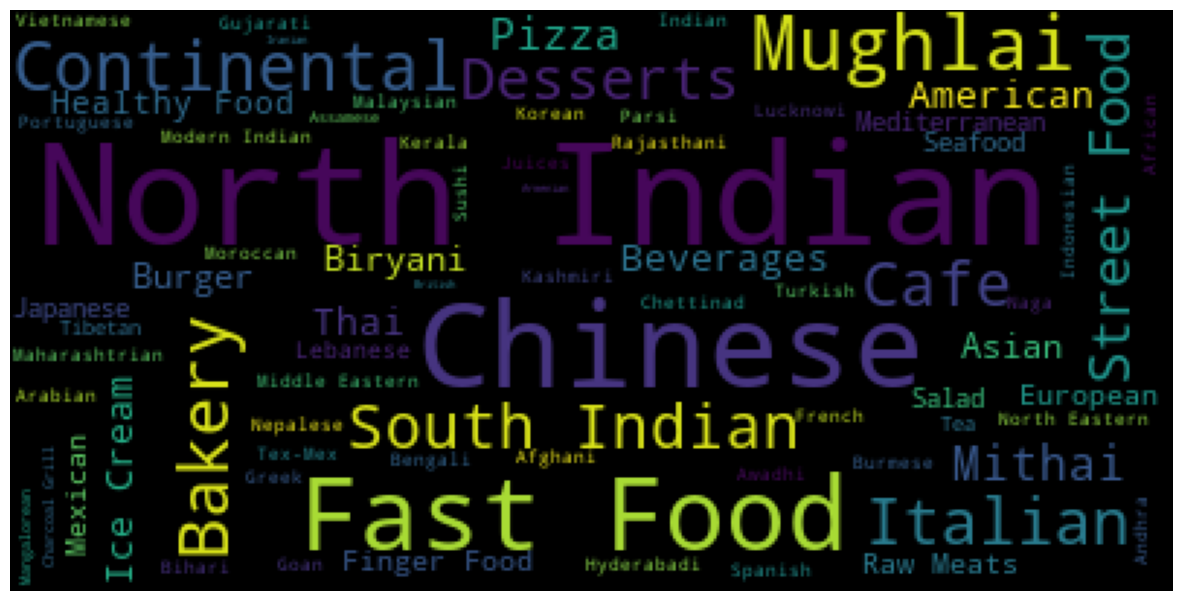

In [146]:
l = []
for i in data.Cuisines.str.split(','):
    l.extend(i)
s = pd.Series([i.strip() for i in l])
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (WordCloud(stopwords=stopwords).generate_from_frequencies(s.value_counts()))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

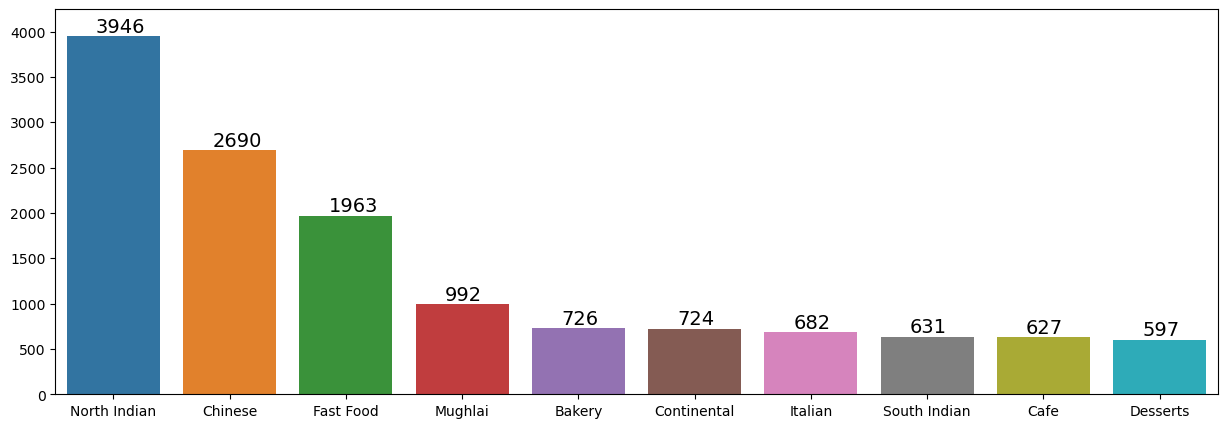

In [115]:
plt.figure(figsize = (15,5))
sns.barplot(x = s.value_counts()[:10].index, y = s.value_counts()[:10] )
for i in range(10):
    plt.annotate(s.value_counts()[i], xy = (i-0.15,s.value_counts()[i]+50),fontsize = 14)
plt.ylim(0, round(s.value_counts()[0]+300))
plt.show()

In [116]:
data['no_cuisines'] = data.Cuisines.str.split(',').apply(len)

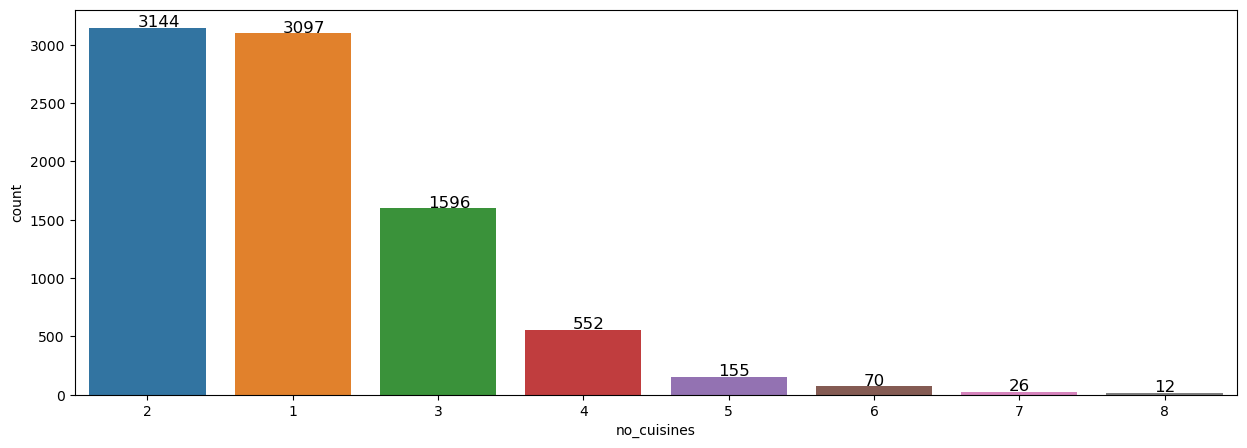

In [118]:
plt.figure(figsize = (15,5))
vc = data.no_cuisines.value_counts()
sns.countplot('no_cuisines', data=data, order = vc.index)
for i in range(len(vc)):
    plt.annotate(vc.iloc[i], xy = (i-0.07,vc.iloc[i]+10), fontsize = 12)
plt.show()

In [119]:
data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country', 'Rating_cat',
       'no_cuisines'],
      dtype='object')

Text(0.5, 1.0, 'Cuisine _ Rating')

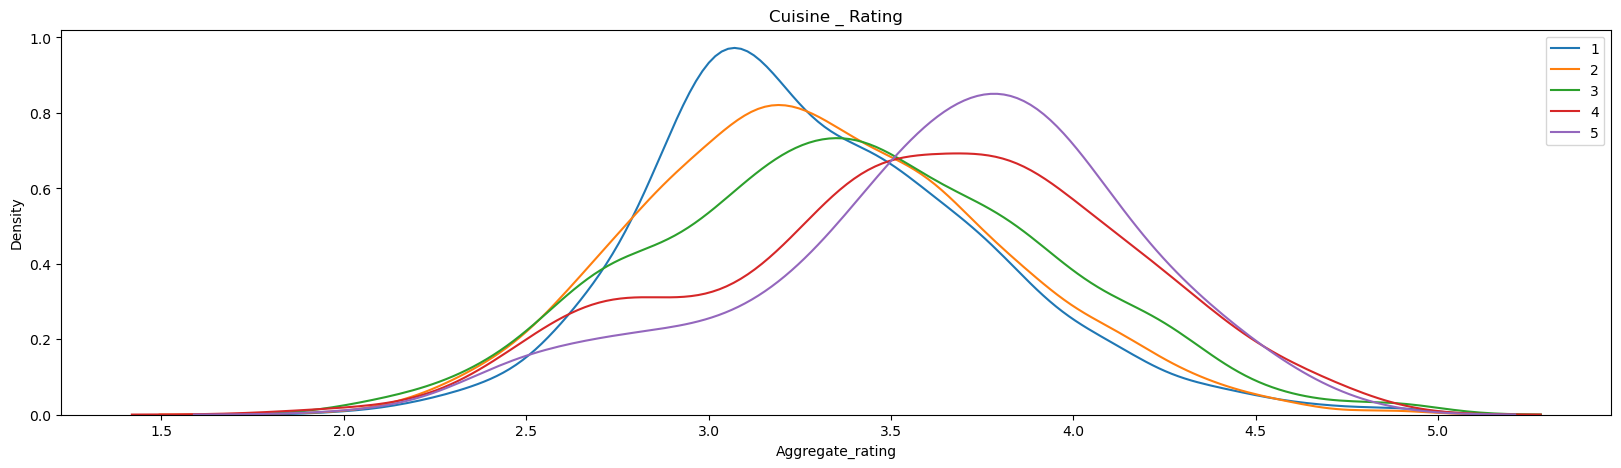

In [123]:
plt.figure(figsize = (20,5))
fusion_rate = data.loc[data.Aggregate_rating >0,['no_cuisines', 'Rating_cat','Aggregate_rating']].copy()
fusion_rate.loc[fusion_rate['no_cuisines'] > 5,'no_cuisines'] = 5
fusion_rate = fusion_rate.loc[fusion_rate.Aggregate_rating != -1, :]
pal = sns.color_palette('Oranges', 11)
for i in range(1,6):
    num_ix = fusion_rate['no_cuisines'] == i
    sns.distplot(fusion_rate.loc[num_ix, 'Aggregate_rating'], label =str(i), hist = False)
    plt.legend()
plt.title('Rating Distribution for fusion_number')
plt.title('Cuisine _ Rating')

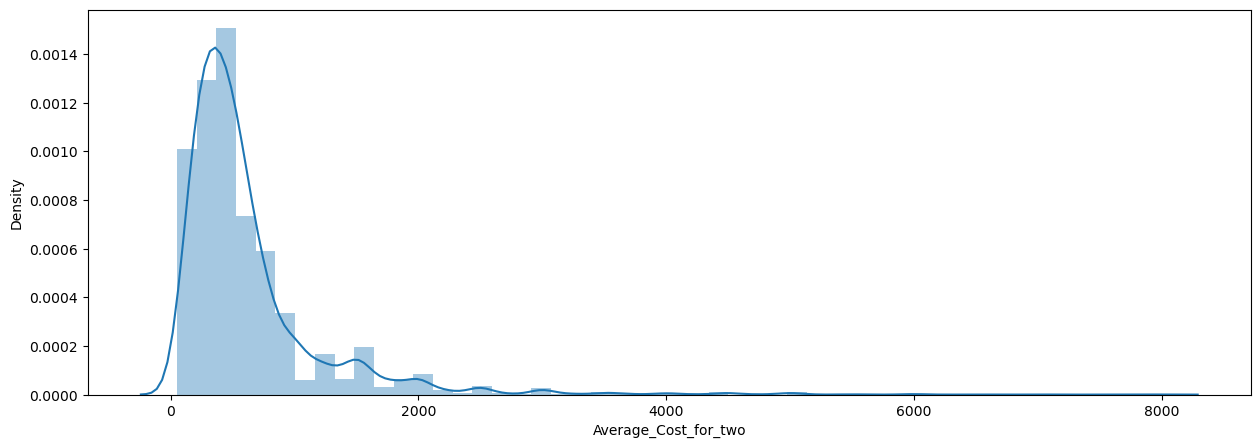

In [124]:
plt.figure(figsize = (15,5))
sns.distplot(data[data.Average_Cost_for_two != 0].Average_Cost_for_two)
plt.show()

In [126]:
data['Average_Cost_for_two_cat']= pd.cut(data[data.Average_Cost_for_two != 0].Average_Cost_for_two,
bins = [0, 200, 500, 1000, 3000, 5000,10000, 800000000],
labels = ['<=200', '<=500', '<=1000', '<=3000', '<=5000', '<=10000', 'nolimit'])

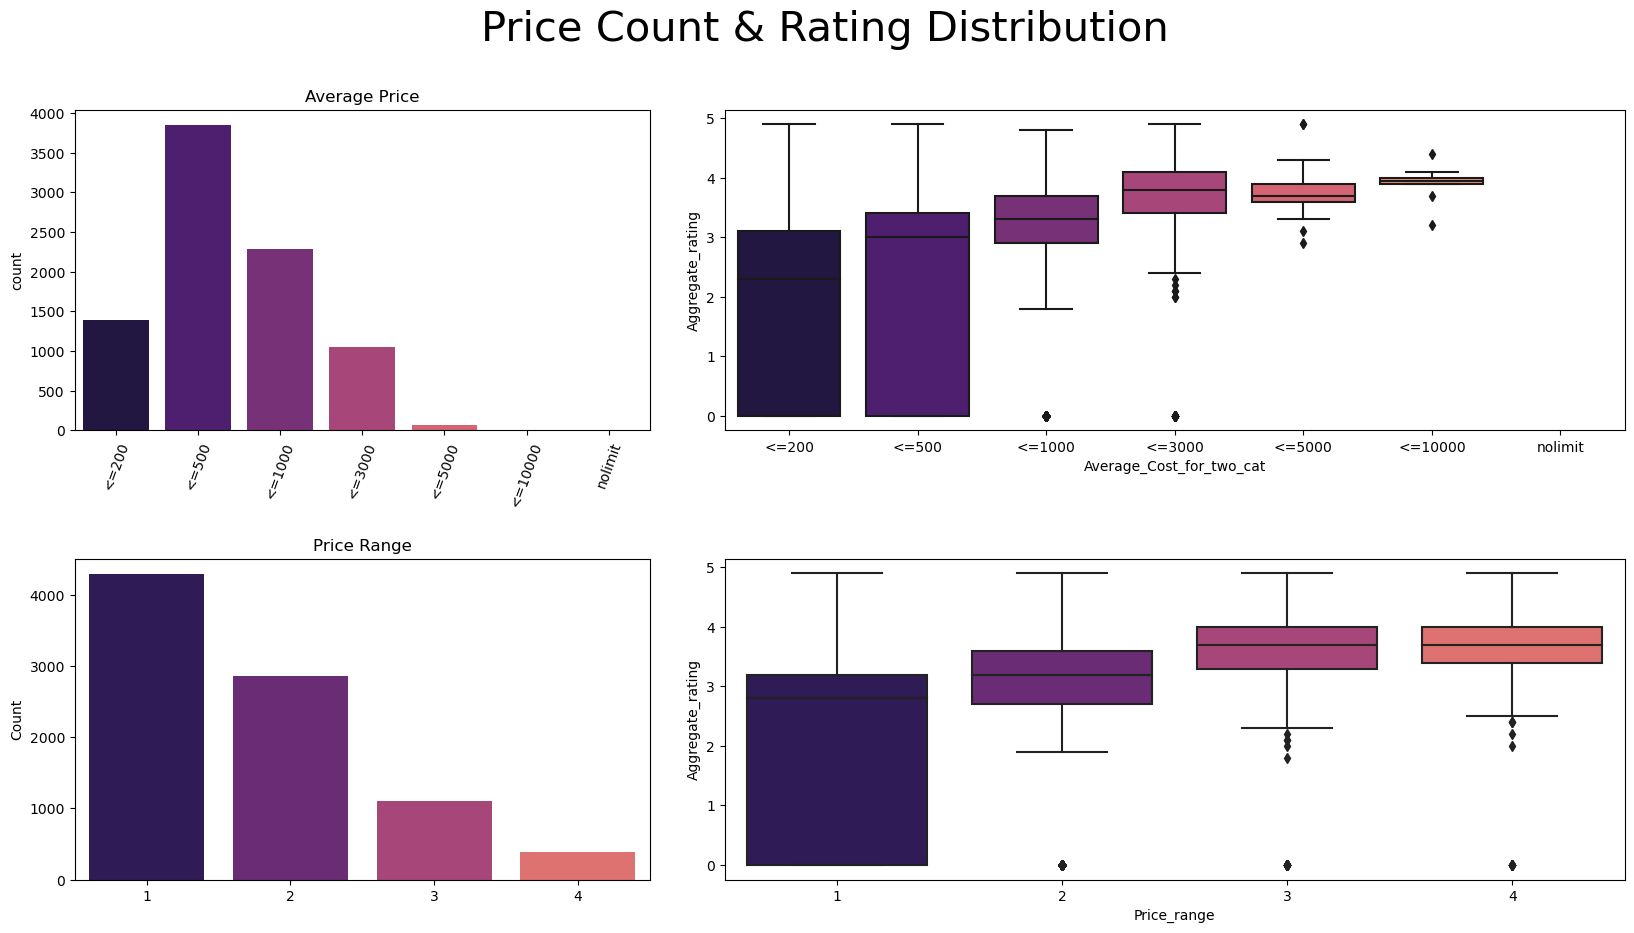

In [128]:
f = plt.figure(figsize = (20,10))
ax = plt.subplot2grid((2,5), (0,0),colspan = 2)
sns.countplot(data['Average_Cost_for_two_cat'], ax = ax, palette = sns.color_palette('magma', 7))
ax.set_title('Average Price')
ax.set_xlabel('')
ax.tick_params('x', rotation = 70)
ax = plt.subplot2grid((2,5), (0,2), colspan = 3)
sns.boxplot(x = 'Average_Cost_for_two_cat', y = 'Aggregate_rating', data =data, ax = ax, palette = sns.color_palette('magma', 7))
count = data['Price_range'].value_counts().reset_index()
count.columns = ['Price_range', 'Count']
ax = plt.subplot2grid((2,5), (1,0),colspan = 2)
sns.barplot(x = 'Price_range', y = 'Count', data = count, ax=ax, palette = sns.color_palette('magma', 5))
ax.set_title('Price Range')
ax.set_xlabel('')
ax = plt.subplot2grid((2,5), (1,2), colspan = 3)
sns.boxplot(x='Price_range', y ='Aggregate_rating', data = data, ax = ax,palette = sns.color_palette('magma', 5))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4,)
plt.suptitle('Price Count & Rating Distribution', size = 30)
plt.show()

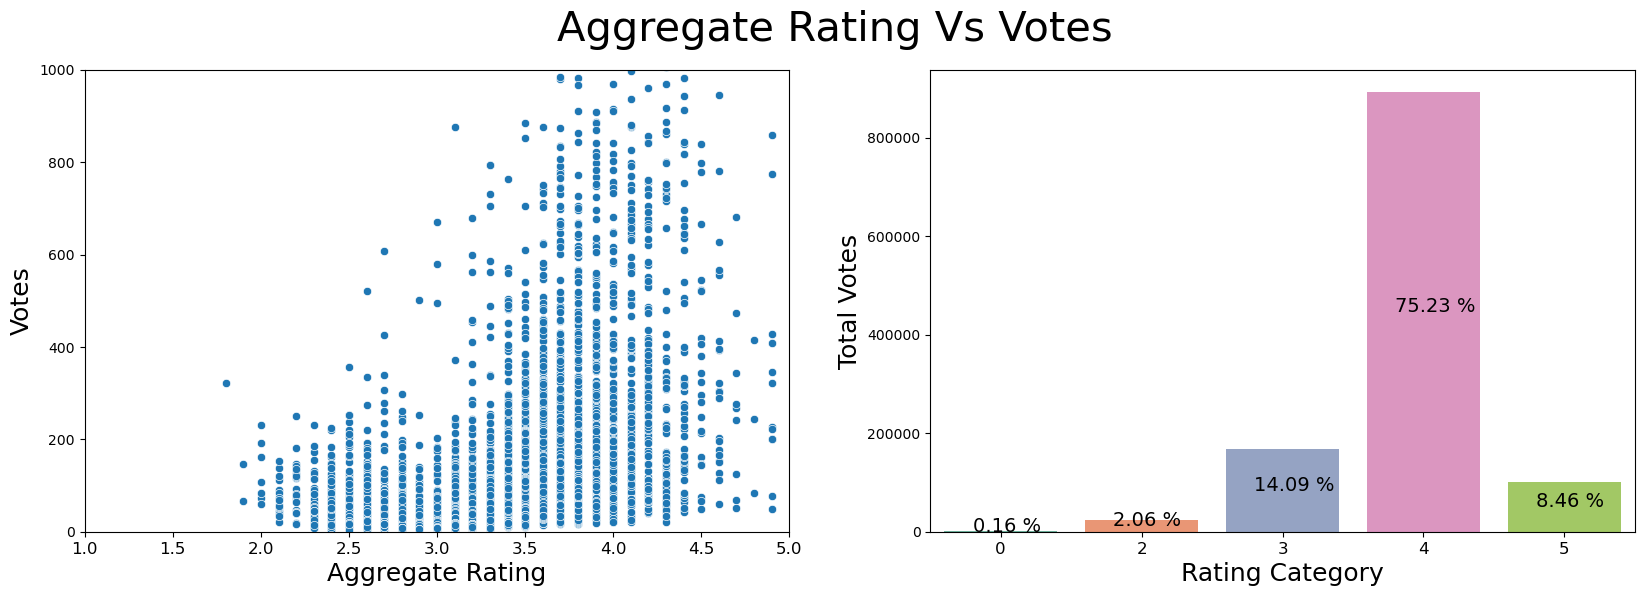

In [130]:
f,ax = plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data=data,x='Aggregate_rating',y='Votes', ax = ax[0], palette ='Set2')
agg = data.pivot_table(index = 'Rating_cat', values = 'Votes', aggfunc = 'sum').reset_index()
agg['Perc_votes']= (agg.Votes/agg.Votes.sum()*100).round(2)
sns.barplot(x = 'Rating_cat', y = 'Votes', data = agg, ax = ax[1], palette='Set2')
for i in range(len(agg)):
    ax[1].annotate(str(agg.Perc_votes[i])+' %', xy = (i-0.2,int(agg.Votes[i]/2)), fontsize = 14, fontweight = 'medium')
ax[0].set_ylim(0,1000)
ax[0].set_xlim(1,5)
ax[0].set_ylabel('Votes',fontsize = 18 )
ax[0].set_xlabel('Aggregate Rating',fontsize = 18 )
ax[0].set_xticklabels(ax[0].get_xticks(),fontsize = 12)
ax[1].set_ylabel('Total Votes',fontsize = 18 )
ax[1].set_xlabel('Rating Category',fontsize = 18 )
ax[1].set_xticklabels(agg.Rating_cat,fontsize = 12)
plt.suptitle('Aggregate Rating Vs Votes', size = 30)
plt.show()